<a href="https://colab.research.google.com/github/YolandaZhao10/CSCI-6170-Project-in-AI-and-ML/blob/main/lab01/Lab1part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies Dataset

We used a movies dataset provided from Kaggle, as the one specified on the instructions was not accessible. We created a class label called ratings, based on the "vote_average". Movies with a voting avergage above 7 are good movies, while all others are bad movies.

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

akshaypawar7_millions_of_movies_path = kagglehub.dataset_download('akshaypawar7/millions-of-movies')
print('Data source import complete.')

Using Colab cache for faster access to the 'millions-of-movies' dataset.
Data source import complete.


In [ ]:
import pandas as pd
import os

df = pd.read_csv(os.path.join(akshaypawar7_millions_of_movies_path, "movies.csv"))
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,3.520565e+08,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,6.567582e+07,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,2024-07-24,200000000.0,1.326387e+09,128.0,Released,Come together.,7.765,3749.0,Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...,hero-superhero-anti hero-mutant-breaking the f...,/8cdWjvZQUExUUTzyp4t6EDMubfO.jpg,/dvBCdCohwWbsP5qAaglOXagDMtk.jpg,573435-519182-957452-1022789-945961-718821-103...
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,4.070455e+08,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,6.838137e+08,167.0,Released,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...


a.1

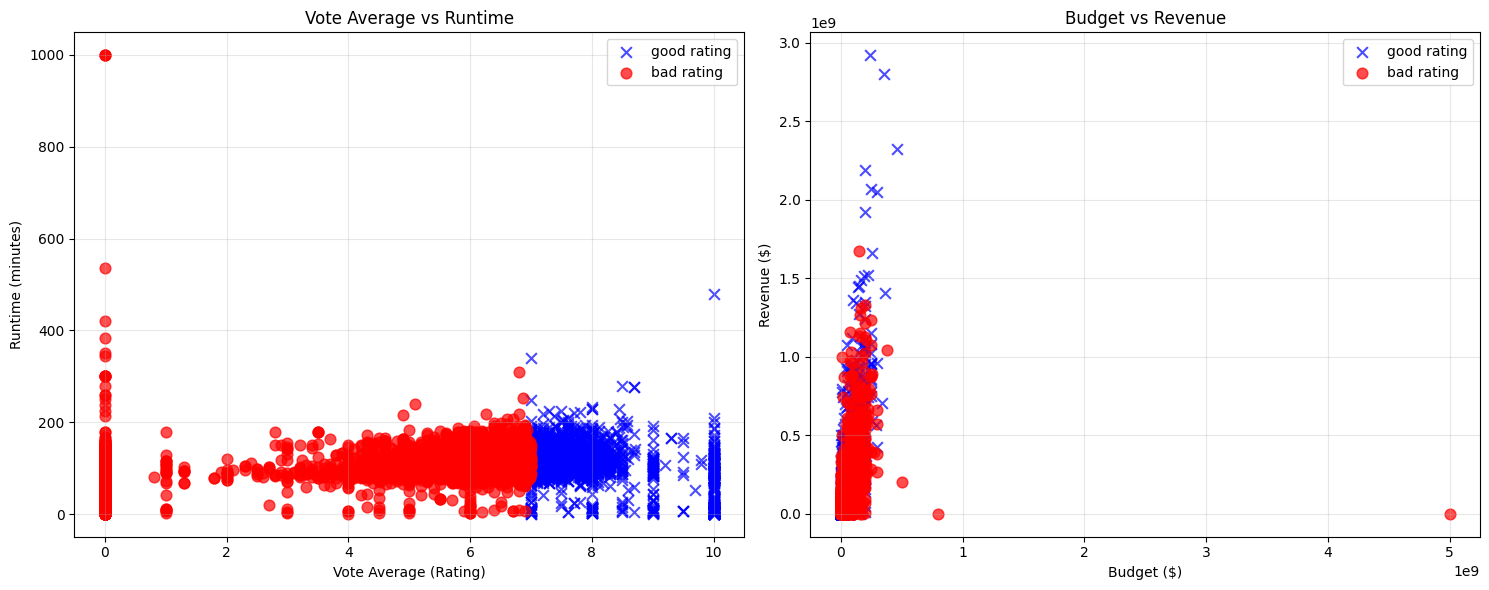

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Create rating class: good if vote_average >= 7.0
df['rating_class'] = np.where(df['vote_average'] >= 7.0, 'good rating', 'bad rating')

# Filter valid positive numeric data
num_cols = ['vote_average', 'runtime', 'budget', 'revenue']
df_plot = df.dropna(subset=num_cols)
df_plot = df_plot[(df_plot['budget'] > 0) & (df_plot['revenue'] > 0) & (df_plot['runtime'] > 0)]

plt.figure(figsize=(15, 6))

# Plot 1: Rating features - vote_average vs runtime
plt.subplot(1, 2, 1)
good = df_plot[df_plot['rating_class'] == 'good rating']
bad = df_plot[df_plot['rating_class'] == 'bad rating']

plt.scatter(good['vote_average'], good['runtime'], marker='x', color='blue', s=60, label='good rating', alpha=0.7)
plt.scatter(bad['vote_average'], bad['runtime'], marker='o', color='red', s=60, label='bad rating', alpha=0.7)

plt.xlabel('Vote Average (Rating)')
plt.ylabel('Runtime (minutes)')
plt.title('Vote Average vs Runtime')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)

# Plot 2: Money features - budget vs revenue
plt.subplot(1, 2, 2)
plt.scatter(good['budget'], good['revenue'], marker='x', color='blue', s=60, label='good rating', alpha=0.7)
plt.scatter(bad['budget'], bad['revenue'], marker='o', color='red', s=60, label='bad rating', alpha=0.7)

plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.title('Budget vs Revenue')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


a.2

The budget shows very little correlation with whether a movie receives a good or bad rating. In contrast, revenue appears to be positively associated with ratings, as higher-rated movies generally generate higher revenue. In fact, all movies with revenue above 1.75 are rated as good. Poorly rated movies tend to have lower revenue overall. The voting average has a direct impact on classification, since a voting average of 7 or higher corresponds to a good rating. However, runtime does not appear to be correlated with movie quality. Movies tend to have similar, generally shorter runtimes regardless of whether they are rated good or bad.

b

Higher IMDb ratings are strongly associated with higher vote counts.
Movies classified as “good” (rating ≥ 7.0) dominate the high-engagement region, while “bad” movies cluster at low vote counts and lower ratings.

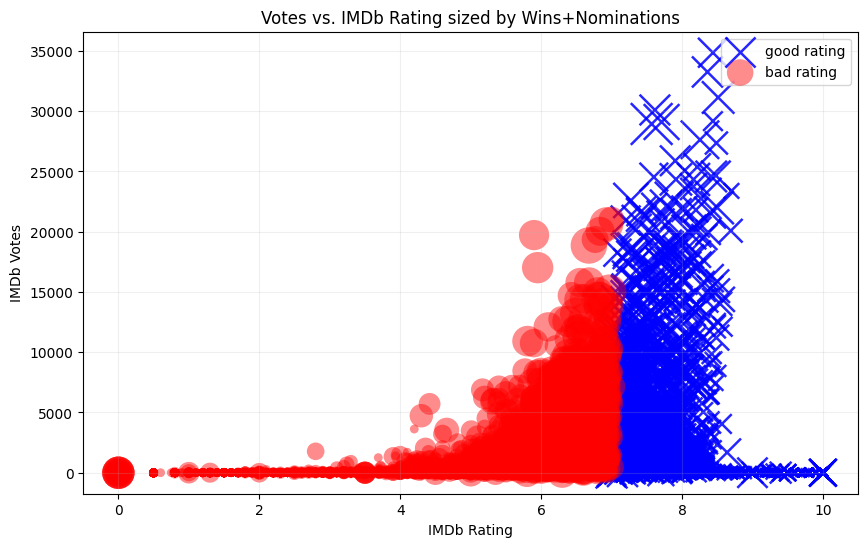

Size feature used: revenue (proxy for Wins+Nominations)
Good threshold: 7.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# df is already loaded

# --- feature mapping (based on your columns) ---
x = pd.to_numeric(df["vote_average"], errors="coerce")  # Feature 6 (IMDb Rating proxy)
y = pd.to_numeric(df["vote_count"], errors="coerce")    # Feature 7 (IMDb Votes proxy)

# Feature 10 proxy for size: prefer revenue, fallback to popularity, then budget
if "revenue" in df.columns:
    size_raw = pd.to_numeric(df["revenue"], errors="coerce")
    size_name = "revenue (proxy for Wins+Nominations)"
elif "popularity" in df.columns:
    size_raw = pd.to_numeric(df["popularity"], errors="coerce")
    size_name = "popularity (proxy for Wins+Nominations)"
else:
    size_raw = pd.to_numeric(df["budget"], errors="coerce")
    size_name = "budget (proxy for Wins+Nominations)"

# --- build plot dataframe ---
plot_df = pd.DataFrame({
    "x": x,
    "y": y,
    "size_raw": size_raw
}).dropna()

# Remove non-positive sizes if using log-like scaling
plot_df = plot_df[plot_df["size_raw"] >= 0]

# --- good/bad classes (threshold can be adjusted) ---
thr = 7.0
good = plot_df["x"] >= thr
bad  = ~good

# --- size scaling (scatter 's' is area in points^2) ---
# Use sqrt scaling for better visual perception + robustness.
s = np.sqrt(plot_df["size_raw"].to_numpy())

if np.nanmax(s) == 0:
    sizes = np.full_like(s, 60.0, dtype=float)
else:
    min_area, max_area = 40, 900   # tune these if needed
    sizes = min_area + (s - np.nanmin(s)) / (np.nanmax(s) - np.nanmin(s)) * (max_area - min_area)

# --- plot ---
plt.figure(figsize=(10, 6))

# good rating: blue crosses
plt.scatter(plot_df.loc[good, "x"], plot_df.loc[good, "y"],
            s=sizes[good.to_numpy()],
            marker="x",
            c="blue",
            alpha=0.85,
            linewidths=1.8,
            label="good rating")

# bad rating: red circles
plt.scatter(plot_df.loc[bad, "x"], plot_df.loc[bad, "y"],
            s=sizes[bad.to_numpy()],
            marker="o",
            c="red",
            alpha=0.45,
            edgecolors="none",
            label="bad rating")

plt.title("Votes vs. IMDb Rating sized by Wins+Nominations")
plt.xlabel("IMDb Rating")
plt.ylabel("IMDb Votes")
plt.legend()
plt.grid(True, alpha=0.2)

# votes can be very skewed; optional:
# plt.yscale("log")

plt.show()

print("Size feature used:", size_name)
print("Good threshold:", thr)


c

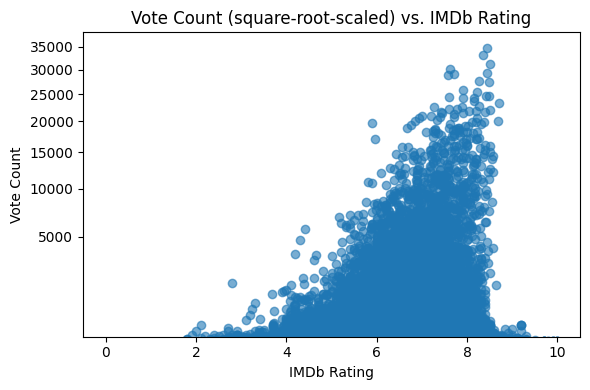

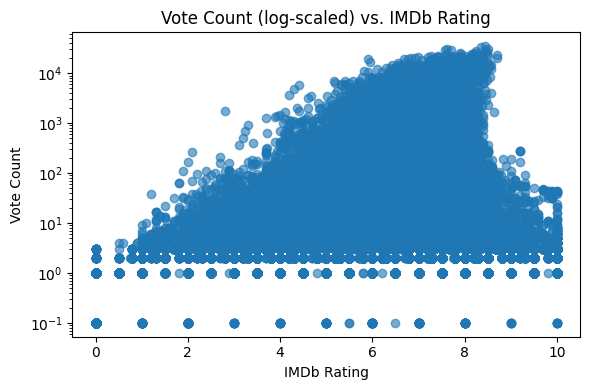

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select columns
x = df["vote_average"]
y = df["vote_count"]

# Remove missing values
mask = (~x.isna()) & (~y.isna())
x = x[mask]
y = y[mask]

# Handle zeros for log scale
y_log = y.copy()
y_log[y_log <= 0] = 0.1

# -----------------------------
# Plot 1: Square-root y-scale
# -----------------------------
plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.6)

plt.yscale("function", functions=(np.sqrt, lambda v: v**2))

plt.title("Vote Count (square-root-scaled) vs. IMDb Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Vote Count")
plt.tight_layout()
plt.show()

# -----------------------------
# Plot 2: Log y-scale
# -----------------------------
plt.figure(figsize=(6, 4))
plt.scatter(x, y_log, alpha=0.6)

plt.yscale("log")

plt.title("Vote Count (log-scaled) vs. IMDb Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Vote Count")
plt.tight_layout()
plt.show()


Square-root scales are useful when values vary moderately and we want to reduce the influence of large values while keeping zeros visible. Log scales are better when data spans several orders of magnitude, making patterns among both small and large values easier to compare.


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score
)

# -----------------------------
# 1) build label: good/bad
# -----------------------------
df2 = df.copy()

# numeric coercions
for c in ["vote_average", "vote_count", "popularity", "budget", "revenue", "runtime"]:
    if c in df2.columns:
        df2[c] = pd.to_numeric(df2[c], errors="coerce")

# feature engineering
df2["overview_len"] = df2["overview"].fillna("").astype(str).str.len()
df2["tagline_len"]  = df2["tagline"].fillna("").astype(str).str.len()

# release year
df2["release_date"] = pd.to_datetime(df2["release_date"], errors="coerce")
df2["release_year"] = df2["release_date"].dt.year

# define good/bad (you can change threshold)
thr = 7.0
df2["y"] = (df2["vote_average"] >= thr).astype(int)

# -----------------------------
# 2) choose features
# -----------------------------
numeric_features = [c for c in ["popularity","budget","revenue","runtime","vote_count","overview_len","tagline_len","release_year"] if c in df2.columns]
categorical_features = [c for c in ["original_language","status"] if c in df2.columns]

# drop rows missing label-related fields
df2 = df2.dropna(subset=["vote_average", "vote_count"])

X = df2[numeric_features + categorical_features]
y = df2["y"].to_numpy()

# -----------------------------
# 3) train/test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 4) model pipeline
# -----------------------------
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop"
)

model = LogisticRegression(max_iter=2000, class_weight="balanced")

clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", model)
])

clf.fit(X_train, y_train)

# predicted probabilities
y_proba = clf.predict_proba(X_test)[:, 1]
y_pred  = (y_proba >= 0.5).astype(int)

# -----------------------------
# 5) bootstrap CI
# -----------------------------
def compute_metrics(y_true, y_pred, y_proba):
    out = {}
    out["accuracy"]  = accuracy_score(y_true, y_pred)
    out["precision"] = precision_score(y_true, y_pred, zero_division=0)
    out["recall"]    = recall_score(y_true, y_pred, zero_division=0)
    out["f1"]        = f1_score(y_true, y_pred, zero_division=0)

    if len(np.unique(y_true)) == 2:
        out["roc_auc"] = roc_auc_score(y_true, y_proba)
        out["pr_auc"]  = average_precision_score(y_true, y_proba)
    else:
        out["roc_auc"] = np.nan
        out["pr_auc"]  = np.nan
    return out

def bootstrap_ci(y_true, y_proba, threshold=0.5, B=1000, alpha=0.05, seed=42):
    rng = np.random.default_rng(seed)
    n = len(y_true)
    keys = ["accuracy","precision","recall","f1","roc_auc","pr_auc"]
    samples = {k: [] for k in keys}

    for _ in range(B):
        idx = rng.integers(0, n, size=n)
        yt = y_true[idx]
        yp = y_proba[idx]
        yhat = (yp >= threshold).astype(int)
        m = compute_metrics(yt, yhat, yp)
        for k in keys:
            samples[k].append(m[k])

    # point estimate on full test set
    point = compute_metrics(y_true, (y_proba >= threshold).astype(int), y_proba)

    lo_q, hi_q = alpha/2, 1 - alpha/2
    summary = {}
    for k in keys:
        arr = np.array(samples[k], dtype=float)
        arr = arr[~np.isnan(arr)]
        summary[k] = {
            "point": float(point[k]),
            "ci_low": float(np.quantile(arr, lo_q)) if arr.size else np.nan,
            "ci_high": float(np.quantile(arr, hi_q)) if arr.size else np.nan
        }
    return summary

summary = bootstrap_ci(y_test, y_proba, threshold=0.5, B=1000, alpha=0.05, seed=42)

print(f"Label definition: good = (vote_average >= {thr})")
print("Features used:", numeric_features + categorical_features)
print("\nMetrics with 95% bootstrap CI (percentile):")
for k, v in summary.items():
    print(f"{k:9s}: {v['point']:.4f}  (95% CI: {v['ci_low']:.4f}, {v['ci_high']:.4f})")


Label definition: good = (vote_average >= 7.0)
Features used: ['popularity', 'budget', 'revenue', 'runtime', 'vote_count', 'overview_len', 'tagline_len', 'release_year', 'original_language', 'status']

Metrics with 95% bootstrap CI (percentile):
accuracy : 0.6653  (95% CI: 0.6629, 0.6677)
precision: 0.1623  (95% CI: 0.1588, 0.1658)
recall   : 0.4358  (95% CI: 0.4283, 0.4433)
f1       : 0.2365  (95% CI: 0.2320, 0.2413)
roc_auc  : 0.5965  (95% CI: 0.5922, 0.6012)
pr_auc   : 0.1775  (95% CI: 0.1728, 0.1823)


Although the overall accuracy is approximately 0.67, this performance is largely driven by class imbalance. Precision remains low (0.16), indicating a high false-positive rate. The ROC-AUC of 0.60 suggests only weak discriminative ability, and PR-AUC is close to the baseline positive rate, indicating limited practical usefulness. Overall, the model exhibits modest predictive power and struggles to reliably distinguish high-rated movies.

Top 5 features by permutation importance:
vote_count    0.002055
budget        0.000242
revenue       0.000159
popularity    0.000138
runtime       0.000000
dtype: float64


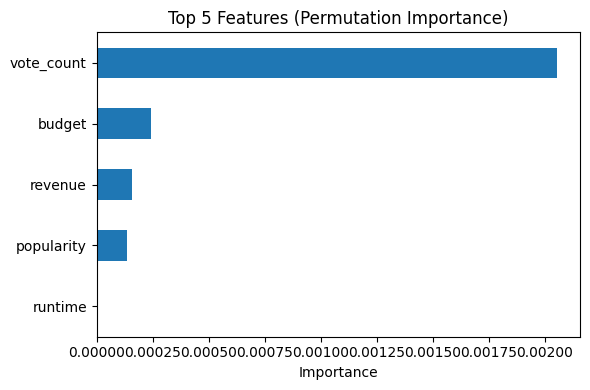

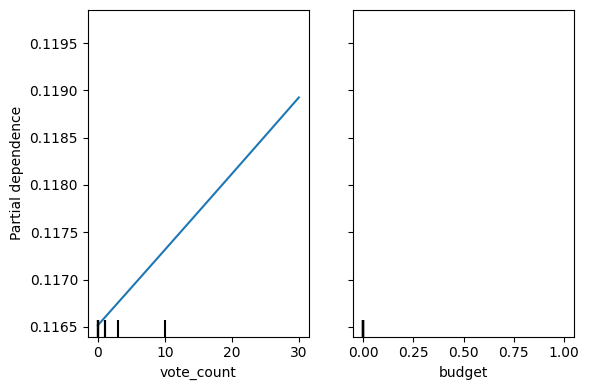

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

# ----------------------------
# 1. Create a target variable
# ----------------------------
df["high_rating"] = (df["vote_average"] >= 7).astype(int)

# ----------------------------
# 2. Select numeric features
# ----------------------------
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
feature_cols = [c for c in numeric_cols if c not in ["high_rating", "id", "vote_average"]]

X = df[feature_cols]
y = df["high_rating"]

# Handle missing values
X = X.fillna(0)

# ----------------------------
# 3. Train-test split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ----------------------------
# 4. Train the model
# ----------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ----------------------------
# 5. Permutation importance
# ----------------------------
result = permutation_importance(
    model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

importances = pd.Series(result.importances_mean, index=X_test.columns)
top5 = importances.sort_values(ascending=False).head(5)

print("Top 5 features by permutation importance:")
print(top5)

# Plot top 5
plt.figure(figsize=(6, 4))
top5.sort_values().plot(kind="barh")
plt.title("Top 5 Features (Permutation Importance)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# ----------------------------
# 6. Partial dependence plots
# ----------------------------
top_features = top5.index[:2]

fig, ax = plt.subplots(figsize=(6, 4))
PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features=top_features,
    ax=ax
)
plt.tight_layout()
plt.show()


Summary:
Permutation importance shows that vote_count is by far the most influential feature for predicting high-rated movies, with budget, revenue, and popularity contributing much less. The partial dependence plot indicates a positive relationship, where higher vote counts are associated with a higher probability of a movie being high-rated.

Limitation:
Some features, such as budget and revenue, may be correlated, which can reduce their measured importance when using permutation methods.